# Predicting IRIS Species Using Logistic Regression

## Importing Libraries

In [43]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Data Preprocessing

In [44]:
# importing the dataset
dataset = pd.read_csv('IRIS.csv')

In [45]:
# checking the first 5 rows of the dataset
print(dataset.head().to_markdown())

|    |   sepal_length |   sepal_width |   petal_length |   petal_width | species     |
|---:|---------------:|--------------:|---------------:|--------------:|:------------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | Iris-setosa |
|  1 |            4.9 |           3   |            1.4 |           0.2 | Iris-setosa |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | Iris-setosa |
|  3 |            4.6 |           3.1 |            1.5 |           0.2 | Iris-setosa |
|  4 |            5   |           3.6 |            1.4 |           0.2 | Iris-setosa |


In [46]:
# collecting information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [47]:
# describing the dataset
print(dataset.describe().to_markdown())

|       |   sepal_length |   sepal_width |   petal_length |   petal_width |
|:------|---------------:|--------------:|---------------:|--------------:|
| count |     150        |    150        |      150       |    150        |
| mean  |       5.84333  |      3.054    |        3.75867 |      1.19867  |
| std   |       0.828066 |      0.433594 |        1.76442 |      0.763161 |
| min   |       4.3      |      2        |        1       |      0.1      |
| 25%   |       5.1      |      2.8      |        1.6     |      0.3      |
| 50%   |       5.8      |      3        |        4.35    |      1.3      |
| 75%   |       6.4      |      3.3      |        5.1     |      1.8      |
| max   |       7.9      |      4.4      |        6.9     |      2.5      |


In [48]:
# checking for null values
print(dataset.isnull().sum().to_markdown())

|              |   0 |
|:-------------|----:|
| sepal_length |   0 |
| sepal_width  |   0 |
| petal_length |   0 |
| petal_width  |   0 |
| species      |   0 |


In [49]:
# checking the shape of the dataset
print("Shape of the dataset is: ", dataset.shape)

Shape of the dataset is:  (150, 5)


In [50]:
# checking the number of values for each species
print(dataset['species'].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


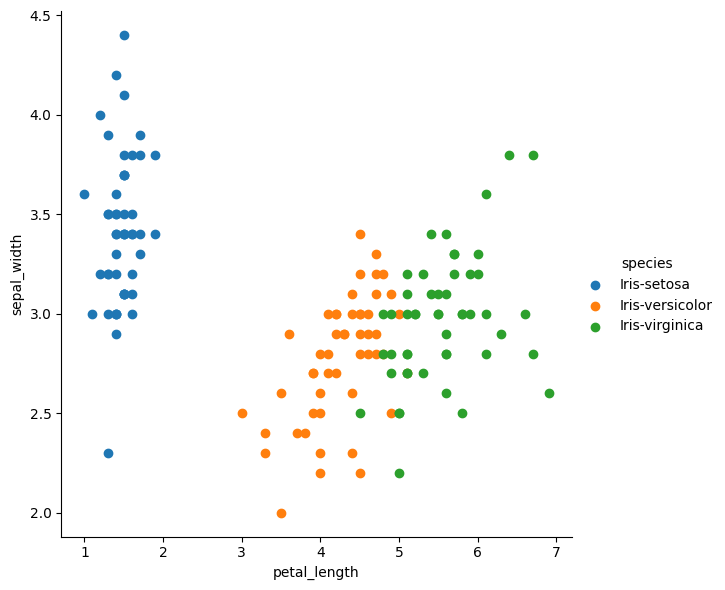

In [51]:
sns.FacetGrid(dataset, hue ="species", height = 6).map(plt.scatter,"petal_length","sepal_width").add_legend()

In [52]:
# mapping the iris species to numerical values
dataset['species'] = dataset['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}) 

In [53]:
# checking the first 5 and last 5 rows of the dataset
print(dataset.head().to_markdown())
print("\n")
print(dataset.tail().to_markdown())

|    |   sepal_length |   sepal_width |   petal_length |   petal_width |   species |
|---:|---------------:|--------------:|---------------:|--------------:|----------:|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 |         0 |
|  1 |            4.9 |           3   |            1.4 |           0.2 |         0 |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 |         0 |
|  3 |            4.6 |           3.1 |            1.5 |           0.2 |         0 |
|  4 |            5   |           3.6 |            1.4 |           0.2 |         0 |


|     |   sepal_length |   sepal_width |   petal_length |   petal_width |   species |
|----:|---------------:|--------------:|---------------:|--------------:|----------:|
| 145 |            6.7 |           3   |            5.2 |           2.3 |         2 |
| 146 |            6.3 |           2.5 |            5   |           1.9 |         2 |
| 147 |            6.5 |           3   |            5.2 |  

## Training and Evaluating the Model 

In [54]:
# defining the input and output variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [55]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=52)

In [56]:
# splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=52)

In [57]:
# training the model
logisitic_regression_model = LogisticRegression()

# fitting the model
logisitic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [58]:
# predicting the values for the validation set
y_pred = logisitic_regression_model.predict(X_val)

# checking the accuracy of the model
print("Accuracy of the model is: ", logisitic_regression_model.score(X_val, y_val))

Accuracy of the model is:  1.0


In [59]:
# predicting the values for the test set
y_pred = logisitic_regression_model.predict(X_test)

# checking the accuracy of the model
print("Accuracy of the model is: ", logisitic_regression_model.score(X_test, y_test))

Accuracy of the model is:  0.9666666666666667


In [61]:
# getting the report of the model
expected = y_test
predicted = y_pred
print (metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.89      0.94         9
           2       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [65]:
# getting the confusion matrix
print(metrics.confusion_matrix(expected, predicted))

[[ 7  0  0]
 [ 0  8  1]
 [ 0  0 14]]


## Visualizing the Model

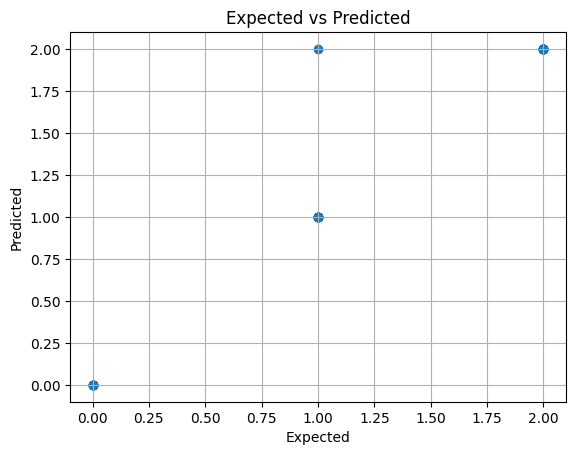

In [64]:
# visualizing the predicted and expected values
plt.scatter(expected, predicted)
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Expected vs Predicted")
plt.grid()
plt.show()